Notebook to study pulse shapes

In [1]:
import ROOT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pdata = "data/Sensl_FastOut_AveragePulse_1p8GHzBandwidth.feather"
df = pd.read_feather(pdata)
print(df)

      index    data_ch0    time
0         0  -92.292698    0.00
1         1    0.037276    0.04
2         2  103.123751    0.08
3         3  209.204898    0.12
4         4  306.343576    0.16
...     ...         ...     ...
4995   4995  140.028373  199.80
4996   4996  179.595298  199.84
4997   4997  217.354768  199.88
4998   4998  233.364683  199.92
4999   4999  233.706586  199.96

[5000 rows x 3 columns]


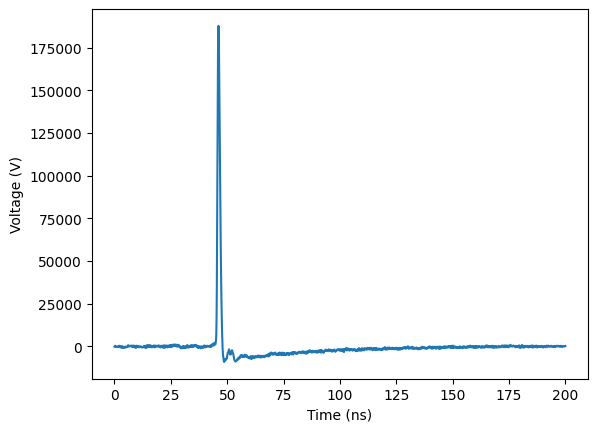

In [ ]:
# Draw data_ch0 vs time
fig, ax = plt.subplots()
ax.plot(df['time'], df['data_ch0'])
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Voltage (mV)')
plt.show()

In [10]:
# save this to a root file
rootfile = ROOT.TFile("data/Sensl_FastOut_AveragePulse_1p8GHzBandwidth.root", "RECREATE")
tree = ROOT.TTree("pulse", "pulse")
time = np.zeros(1, dtype=float)
data_ch0 = np.zeros(1, dtype=float)

tree.Branch("time", time, "time/D")
tree.Branch("data_ch0", data_ch0, "data_ch0/D")

for i in range(len(df)):
    time[0] = df['time'][i]
    data_ch0[0] = df['data_ch0'][i]
    tree.Fill()
    
# make a tgraph from the data
gr = ROOT.TGraph(len(df), df['time'].values, df['data_ch0'].values)
gr.SetName("gr")

# convert the tgraph to a histogram
hist = ROOT.TH1F("hist", "hist", len(df), df['time'].min(), df['time'].max())
for i in range(len(df)):
    hist.SetBinContent(i+1, df['data_ch0'][i])
    
hist.GetXaxis().SetTitle("Time (ns)")
hist.GetYaxis().SetTitle("Voltage (mV)")
hist.Write()
    
# save only 40 ns to 60 ns, and shift it by 40 ns
t0 = 40.0
hist2 = ROOT.TH1F("hist2", "hist (with 40ns shift)", 500, 0, 20.0)
for i in range(int(t0/0.04), int((t0+20.0)/0.04)):
    hist2.SetBinContent(i - int(t0/0.04) + 1, df['data_ch0'][i])


hist2.GetXaxis().SetTitle("Time (ns)") 
hist2.GetYaxis().SetTitle("Voltage (mV)")
hist2.Write()

gr.Write()
    
rootfile.Write()
rootfile.Close()